# Predictive Models
This notebook is to examine the performance of various models using a Google Cloud virtual machine with 16 CPUs and 30 GB memory. For model exploration, refer to the model's notebook within the [notebooks](notebooks) folder. The models are in the following order:

1. **Logistic Regression**
    * Random Under-sampling
    * SVM-SMOTE (Synthetic Minority Over-sampling Technique)
1. **Random Forest**
    * Random Under-sampling
    * TF-IDF and Random Under-sampling
1. **Support Vector Machine**
    * Random Under-sampling
1. **Word2Vec**
    * Latent Dirichlet Allocation (LDA), Logistic Regression
    * Logistic Regression and Random Under-sampling
    * LDA, Logistic Regression, and Random Under-sampling

In [1]:
# import libraries
import os
import sys
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
# define project root directory
PROJ_ROOT = os.path.join(os.pardir)

# define source directory
src_dir = os.path.join('src')
sys.path.append(src_dir)

In [3]:
# import project modules
from features.build_features import clean_and_tokenize
from visualization.visualize import plot_confusion_matrix, draw_roc_curve
from models.train_model import *

In [4]:
%load_ext watermark
%watermark -a "E. Chris Lynch" -d -t -v -p numpy,pandas,matplotlib,gensim,nltk,sklearn,imblearn

E. Chris Lynch 2019-03-15 05:40:56 

CPython 3.7.2
IPython 7.2.0

numpy 1.15.4
pandas 0.23.4
matplotlib 3.0.2
gensim 3.7.1
nltk 3.4
sklearn 0.20.2
imblearn 0.4.3


In [5]:
# locate CSV file
data_file =  'data/processed/clinic_train_data.csv'

# split into train and test sets
X_train, X_test, y_train, y_test = load_and_split_df(data_file)

## Logistic Regression
### Random Under-sampling

In [6]:
# define Count Vectorizer parameters
vec_params = {'max_features': 3000, 'tokenizer': clean_and_tokenize, 'stop_words': 'english'}

# define logistic regression parameters
lr_params = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs', 'random_state': 42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = logistic_regression(vec_params=vec_params, lr_params=lr_params, 
                                                         train_feat=X_train, train_label=y_train,
                                                         test_feat=X_test, test_label=y_test,
                                                         model='rus')

Confusion matrix, without normalization
[[7942 3155]
 [ 304  407]]


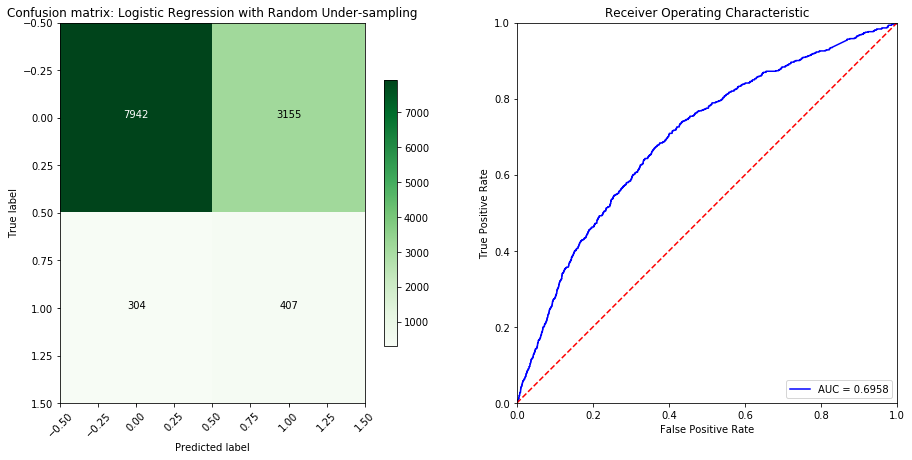

In [7]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Logistic Regression with Random Under-sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)
    
plt.show()

### SVM-SMOTE

In [8]:
# define logistic regression parameters
lr_params = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 700, 'random_state': 42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = logistic_regression(vec_params=vec_params, lr_params=lr_params, 
                                                         train_feat=X_train, train_label=y_train,
                                                         test_feat=X_test, test_label=y_test,
                                                         model='svmsmote')

Confusion matrix, without normalization
[[10630   467]
 [  625    86]]


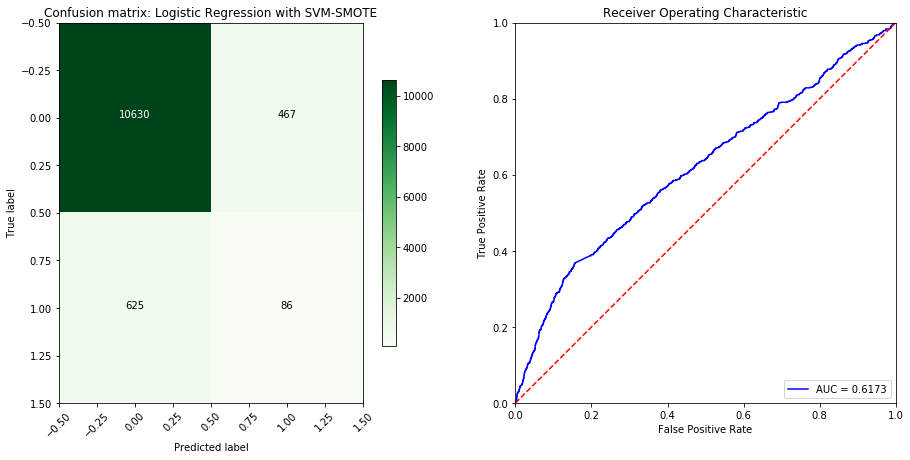

In [9]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Logistic Regression with SVM-SMOTE', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)
    
plt.show()

## Random Forest
### Random Under-sampling

In [10]:
# define logistic regression parameters
rf_params = {'n_estimators':500, 'max_depth':25, 'random_state':42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = random_forest_undersampler(vec_params=vec_params, rf_params=rf_params,
                                                                train_feat=X_train, train_label=y_train,
                                                                test_feat=X_test, test_label=y_test)

Confusion matrix, without normalization
[[6818 4279]
 [ 208  503]]


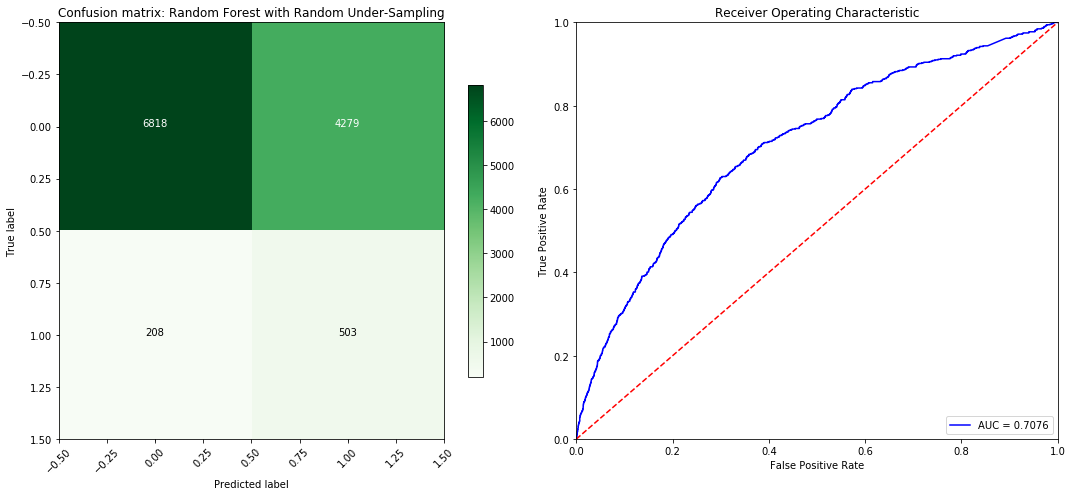

In [11]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Random Forest with Random Under-Sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)

plt.tight_layout()
plt.show()

### TF-IDF and Random Under-sampling

In [12]:
# define logistic regression parameters
rf_params = {'n_estimators':500, 'max_depth':25, 'random_state':42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = random_forest_undersampler(vec_params=vec_params, rf_params=rf_params,
                                                                train_feat=X_train, train_label=y_train,
                                                                test_feat=X_test, test_label=y_test, tfidf=True)

Confusion matrix, without normalization
[[7162 3935]
 [ 228  483]]


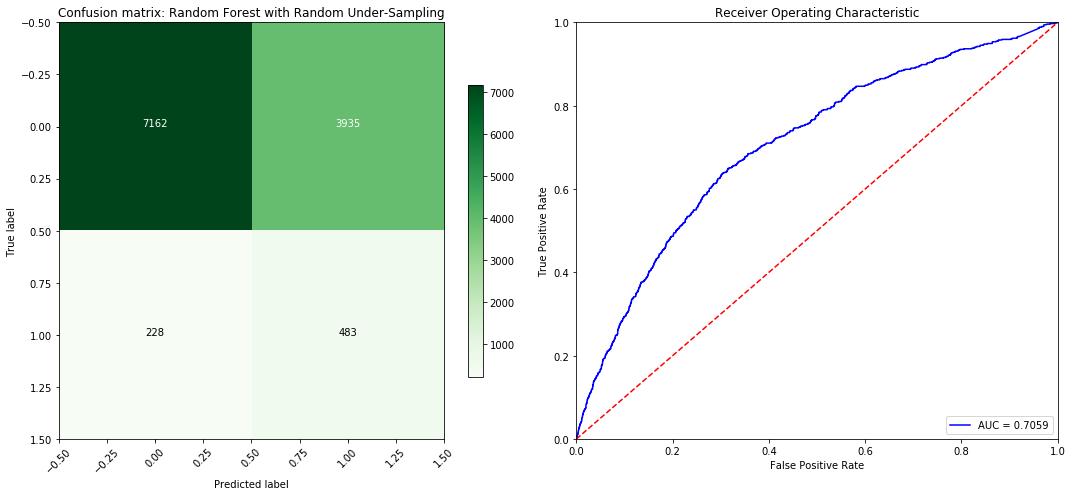

In [13]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Random Forest with Random Under-Sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)

plt.tight_layout()
plt.show()

## Support Vector Machine

In [14]:
# define SVM parameters
svm_params = {'C':1.0, 'gamma':'scale', 'probability':True, 'random_state':42}

# train and fit SVM model
pipe_svm, pipe_fit_svm, y_pred_svm, cnf_matrix_svm = svm_text_classification(vec_params=vec_params, svm_params=svm_params,
                                                                             train_feat=X_train, train_label=y_train,
                                                                             test_feat=X_test, test_label=y_test)

Confusion matrix, without normalization
[[7400 3697]
 [ 256  455]]


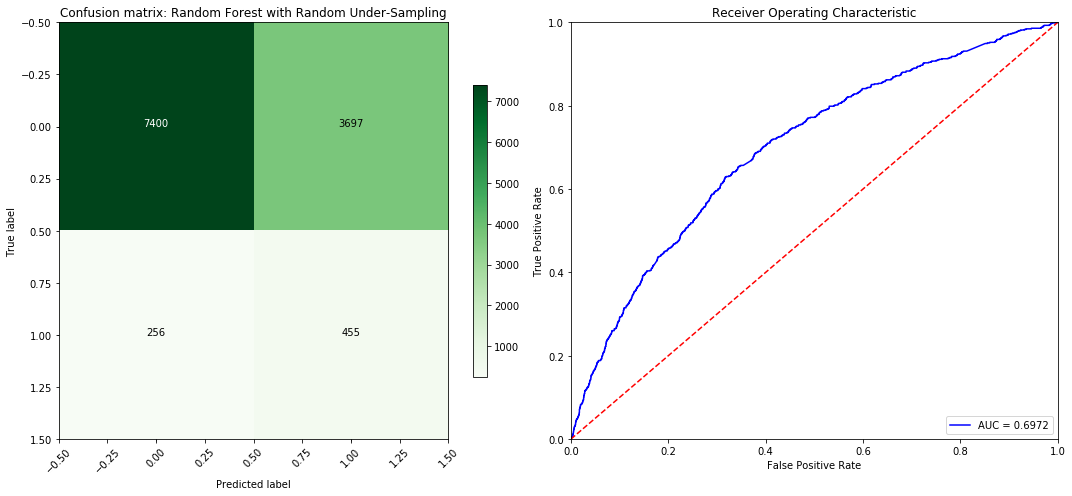

In [15]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_svm, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Random Forest with Random Under-Sampling', 
                      cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe_svm, features=X_test, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

## Word2Vec
### Latent Dirichlet Allocation

In [16]:
from models.train_model import create_w2v_dataframe
df_train, df_test = create_w2v_dataframe(data_file)

In [18]:
# drop rows with empty notes
doc_lengths = np.array(list(map(len, df_train.text.str.split(' '))))
df_train = df_train[doc_lengths > 2].copy()

# replace apostrophes
df_train['text'] = df_train.text.str.replace("'", "")

In [19]:
%%time
# split and tokenize sentences
w2v_preprocessing(df_train)

CPU times: user 14min 49s, sys: 7.86 s, total: 14min 57s
Wall time: 14min 57s


In [20]:
%%time
# get clean tokens for LDA
lda_get_good_tokens(df_train)

CPU times: user 12min 25s, sys: 4.01 s, total: 12min 29s
Wall time: 12min 29s


In [21]:
# define stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [22]:
%%time
# remove stopwords
df_train['stopwords_removed'] = list(map(lambda doc:
                                       [word for word in doc if word not in stopwords],
                                       df_train.tokenized_text))

CPU times: user 2min 17s, sys: 24 ms, total: 2min 17s
Wall time: 2min 17s


In [23]:
%%time
# lemmatize and stem words
stem_words(df_train)

CPU times: user 15min 13s, sys: 3.38 s, total: 15min 16s
Wall time: 15min 17s


In [24]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23971 entries, 1187 to 8774
Data columns (total 8 columns):
label                  23971 non-null int64
text                   23971 non-null object
document_sentences     23971 non-null object
tokenized_sentences    23971 non-null object
tokenized_text         23971 non-null object
stopwords_removed      23971 non-null object
lemmatized_text        23971 non-null object
stemmed_text           23971 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1 GB


In [25]:
# create a dictionary for the model
dictionary = Dictionary(documents=df_train.stemmed_text.values)
    
# filter frequent and infrequent words
dictionary.filter_extremes(no_above=0.8, no_below=3)
    
# reindex after filtering
dictionary.compactify()

# save dictionary as text
dictionary.save_as_text('data/dictionary.dicttxt')

In [ ]:
# load dictionary
#dictionary = Dictionary.load_from_text('data/dictionary.dicttxt')

In [26]:
%%time

# make bag-of-words for each doc
df_train['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), df_train.stemmed_text))

CPU times: user 23.9 s, sys: 1.1 s, total: 25 s
Wall time: 25 s


In [34]:
# save the dataframe
df_train.to_json('data/df_train.json')

In [27]:
# define corpus
corpus = df_train.bow

In [28]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [29]:
#A multicore approach to decrease training time
LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=150,
                        workers=14,
                        chunksize=4000,
                        passes=10,
                        alpha='asymmetric',
                        random_state=np.random.RandomState(42))

2019-03-15 06:43:32,655 : INFO : using asymmetric alpha [0.031139033, 0.028788464, 0.02676786, 0.025012296, 0.023472836, 0.02211189, 0.020900112, 0.019814245, 0.018835641, 0.017949153, 0.017142355, 0.01640497, 0.015728405, 0.015105434, 0.014529934, 0.013996676, 0.013501173, 0.0130395545, 0.012608458, 0.012204954, 0.011826476, 0.011470766, 0.011135828, 0.010819895, 0.010521393, 0.010238921, 0.009971219, 0.009717159, 0.009475723, 0.0092459945, 0.009027141, 0.008818409, 0.008619112, 0.008428624, 0.008246372, 0.008071837, 0.007904536, 0.0077440296, 0.0075899116, 0.0074418085, 0.0072993743, 0.0071622906, 0.0070302603, 0.00690301, 0.0067802845, 0.0066618463, 0.006547475, 0.006436964, 0.006330122, 0.0062267683, 0.0061267363, 0.0060298666, 0.005936013, 0.0058450364, 0.0057568057, 0.0056711994, 0.0055881017, 0.005507404, 0.005429004, 0.005352805, 0.005278715, 0.0052066483, 0.0051365225, 0.0050682607, 0.0050017894, 0.0049370397, 0.0048739444, 0.0048124413, 0.004752471, 0.0046939775, 0.004636906,

In [30]:
# save LDA model to disk
from gensim.test.utils import datapath
temp_file = datapath("ldamodel")
LDAmodel.save(temp_file)

2019-03-15 07:41:01,066 : INFO : saving LdaState object under /opt/anaconda3/lib/python3.7/site-packages/gensim/test/test_data/ldamodel.state, separately None
2019-03-15 07:41:01,067 : INFO : storing np array 'sstats' to /opt/anaconda3/lib/python3.7/site-packages/gensim/test/test_data/ldamodel.state.sstats.npy
2019-03-15 07:41:01,776 : INFO : saved /opt/anaconda3/lib/python3.7/site-packages/gensim/test/test_data/ldamodel.state
2019-03-15 07:41:01,909 : INFO : saving LdaMulticore object under /opt/anaconda3/lib/python3.7/site-packages/gensim/test/test_data/ldamodel, separately ['expElogbeta', 'sstats']
2019-03-15 07:41:01,911 : INFO : storing np array 'expElogbeta' to /opt/anaconda3/lib/python3.7/site-packages/gensim/test/test_data/ldamodel.expElogbeta.npy
2019-03-15 07:41:02,140 : INFO : not storing attribute dispatcher
2019-03-15 07:41:02,141 : INFO : not storing attribute id2word
2019-03-15 07:41:02,142 : INFO : not storing attribute state
2019-03-15 07:41:02,147 : INFO : saved /opt/

In [ ]:
# load pretrained model
from gensim.test.utils import datapath
temp_file = datapath("ldamodel")
LDAmodel= LdaMulticore.load(temp_file)

In [32]:
%%time
# create LDA features
df_train['lda_features'] = list(map(lambda doc:
                                    document_to_lda_features(LDAmodel, doc),
                                    df_train.bow))

CPU times: user 18min 20s, sys: 7.08 s, total: 18min 27s
Wall time: 2min 18s


In [33]:
%%time
# build list of sentences
sentences = []
for sentence_group in df_train.tokenized_sentences:
    sentences.extend(sentence_group)

CPU times: user 888 ms, sys: 164 ms, total: 1.05 s
Wall time: 1.05 s


In [34]:
# build word2vec model
W2Vmodel = Word2Vec(sentences=sentences,
                    sg=1,
                    hs=0,
                    workers=14,
                    size=200,
                    min_count=3,
                    window=6,
                    sample=1e-3,
                    negative=5,
                    iter=6,
                    seed=42)

2019-03-15 07:44:45,744 : INFO : collecting all words and their counts
2019-03-15 07:44:45,745 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-03-15 07:44:45,800 : INFO : PROGRESS: at sentence #10000, processed 122213 words, keeping 9365 word types
2019-03-15 07:44:45,850 : INFO : PROGRESS: at sentence #20000, processed 224980 words, keeping 13348 word types
2019-03-15 07:44:45,899 : INFO : PROGRESS: at sentence #30000, processed 330395 words, keeping 16120 word types
2019-03-15 07:44:45,946 : INFO : PROGRESS: at sentence #40000, processed 435263 words, keeping 19235 word types
2019-03-15 07:44:46,000 : INFO : PROGRESS: at sentence #50000, processed 551770 words, keeping 21958 word types
2019-03-15 07:44:46,055 : INFO : PROGRESS: at sentence #60000, processed 660360 words, keeping 24766 word types
2019-03-15 07:44:46,105 : INFO : PROGRESS: at sentence #70000, processed 769699 words, keeping 27384 word types
2019-03-15 07:44:46,158 : INFO : PROGRESS: at s

In [35]:
# save word2vec model
W2Vmodel.save("word2vec.model")

2019-03-15 07:53:52,520 : INFO : saving Word2Vec object under word2vec.model, separately None
2019-03-15 07:53:52,522 : INFO : storing np array 'vectors' to word2vec.model.wv.vectors.npy
2019-03-15 07:53:52,694 : INFO : not storing attribute vectors_norm
2019-03-15 07:53:52,696 : INFO : storing np array 'syn1neg' to word2vec.model.trainables.syn1neg.npy
2019-03-15 07:53:53,550 : INFO : not storing attribute cum_table
2019-03-15 07:53:54,793 : INFO : saved word2vec.model


In [ ]:
# load word2vec model
W2Vmodel = Word2Vec.load("word2vec.model")

In [36]:
%%time
# get w2v features
df_train['w2v_features'] = list(map(lambda sen_group:
                                    get_w2v_features(W2Vmodel, sen_group),
                                    df_train.tokenized_sentences))

CPU times: user 1h 8min 46s, sys: 1.45 s, total: 1h 8min 47s
Wall time: 1h 8min 48s


In [37]:
%%time
# transform LDA and Word2Vec features
X_train_lda = np.array(list(map(np.array, df_train.lda_features)))
X_train_w2v = np.array(list(map(np.array, df_train.w2v_features)))

CPU times: user 256 ms, sys: 48 ms, total: 304 ms
Wall time: 304 ms


In [38]:
# save LDA and w2v feature vectors
np.save('data/x_train_lda.npy',X_train_lda)
np.save('data/x_train_w2v.npy',X_train_w2v)

In [39]:
# define training labels
y_train = df_train.label

In [40]:
# save training labels
np.save('data/y_train.npy', df_train.label.values)

In [ ]:
# load LDA and w2v feature vectors
X_train_lda = np.load('data/x_train_lda.npy')
X_train_w2v = np.load('data/x_train_w2v.npy')

In [41]:
%%time

# prepare testing data
w2v_preprocessing(df_test)

CPU times: user 7min 55s, sys: 4.86 s, total: 8min
Wall time: 7min 59s


In [42]:
%%time
# get clean tokens for LDA
lda_get_good_tokens(df_test)

CPU times: user 6min 10s, sys: 2.33 s, total: 6min 13s
Wall time: 6min 13s


In [43]:
%%time
# remove stopwords
remove_stopwords(df_test)

CPU times: user 1min 7s, sys: 36 ms, total: 1min 7s
Wall time: 1min 7s


In [44]:
# save test dataframe
df_test.to_json('data/df_test.json')

In [45]:
%%time
# stem words
stem_words(df_test)

CPU times: user 7min 32s, sys: 1.14 s, total: 7min 33s
Wall time: 7min 33s


In [46]:
%%time
# create corpus
df_test['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), df_test.stemmed_text))

CPU times: user 15 s, sys: 816 ms, total: 15.9 s
Wall time: 15.9 s


In [47]:
%%time

# create LDA features
df_test['lda_features'] = list(map(lambda doc:
                                    document_to_lda_features(LDAmodel, doc),
                                    df_test.bow))

CPU times: user 8min 49s, sys: 3.56 s, total: 8min 53s
Wall time: 1min 6s


In [48]:
%%time

# create word2vec features
df_test['w2v_features'] = list(map(lambda sen_group:
                                  get_w2v_features(W2Vmodel, sen_group),
                                  df_test.tokenized_sentences))

CPU times: user 33min 54s, sys: 504 ms, total: 33min 54s
Wall time: 33min 55s


In [49]:
# transform test data features
X_test_lda = np.array(list(map(np.array, df_test.lda_features)))
X_test_w2v = np.array(list(map(np.array, df_test.w2v_features)))

In [50]:
np.save('data/x_test_lda.npy', X_test_lda)
np.save('data/x_test_w2v.npy', X_test_w2v)

In [51]:
# append Word2Vec and LDA features
combined_features_train = np.append(X_train_lda, X_train_w2v, axis=1)
combined_features_test = np.append(X_test_lda, X_test_w2v, axis=1)

In [52]:
np.save('data/comb_features_trn.npy',combined_features_train)
np.save('data/comb_features_test.npy',combined_features_test)

In [53]:
y_test = df_test.label

In [54]:
# train and fit Word2Vec model with LDA and Logistic Regression
lr_params = {'solver':'liblinear', 'penalty': 'l2', 'random_state':42}

clf_lda, clf_fit_lda, y_pred_lda, cnf_matrix_lda = word2vec_logistic_regression(train_feat=combined_features_train, train_label=y_train, 
                                                                                model='w2v_lda', test_feat=combined_features_test, 
                                                                                test_label=y_test, lr_params=lr_params)

Confusion matrix, without normalization
[[11097     0]
 [  711     0]]


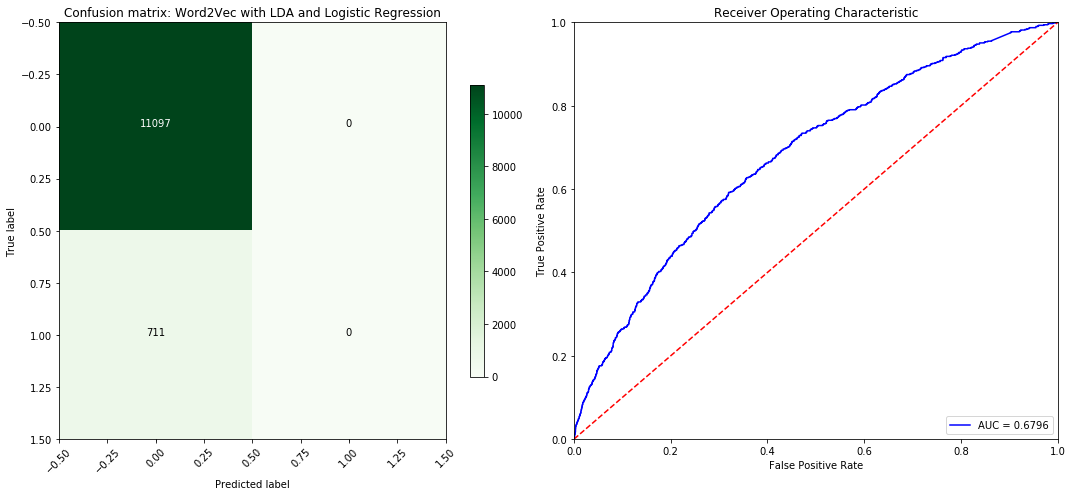

In [55]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_lda, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Word2Vec with LDA and Logistic Regression', 
                      cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=clf_lda, features=combined_features_test, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

### LDA and Random Under-Sampling

In [56]:
%%time
# undersample majority class
df_train_undersampled = random_undersample(df_train)

CPU times: user 828 ms, sys: 4 ms, total: 832 ms
Wall time: 849 ms


In [57]:
# extract and combine features
X_train_lda_rus = np.array(list(map(np.array, df_train_undersampled.lda_features)))
X_train_w2v_rus = np.array(list(map(np.array, df_train_undersampled.w2v_features)))
X_train_combined_rus = np.append(X_train_lda_rus, X_train_w2v_rus, axis=1)

In [58]:
# train and fit Word2Vec and LDA model with undersampled majority class
clf_lda_rus, clf_fit_lda_rus, y_pred_lda_rus, cnf_matrix_lda_rus = word2vec_logistic_regression(train_feat=X_train_combined_rus, train_label=df_train_undersampled.label,
                                                                                                model='w2v_lda', test_feat=combined_features_test, 
                                                                                                test_label=y_test, lr_params=lr_params)

Confusion matrix, without normalization
[[7418 3679]
 [ 305  406]]


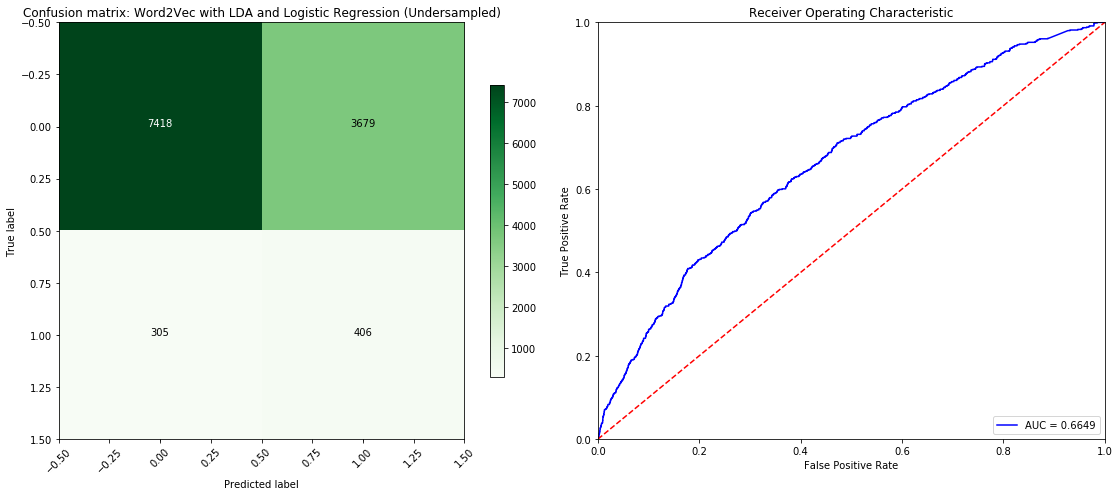

In [59]:
plt.figure(figsize=(16, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_lda_rus, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Word2Vec with LDA and Logistic Regression (Undersampled)', 
                      cmap=plt.cm.Greens, ax=ax1)

# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=clf_lda_rus, features=combined_features_test, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

### Random Under-Sampling

In [60]:
# train and fit Word2Vec and LDA model with undersampled majority class
clf_rus, clf_fit_rus, y_pred_rus, cnf_matrix_rus = word2vec_logistic_regression(train_feat=X_train_w2v_rus, train_label=df_train_undersampled.label,
                                                                                model='w2v_lda', test_feat=X_test_w2v,
                                                                                test_label=y_test, lr_params=lr_params)

Confusion matrix, without normalization
[[5036 6061]
 [ 234  477]]


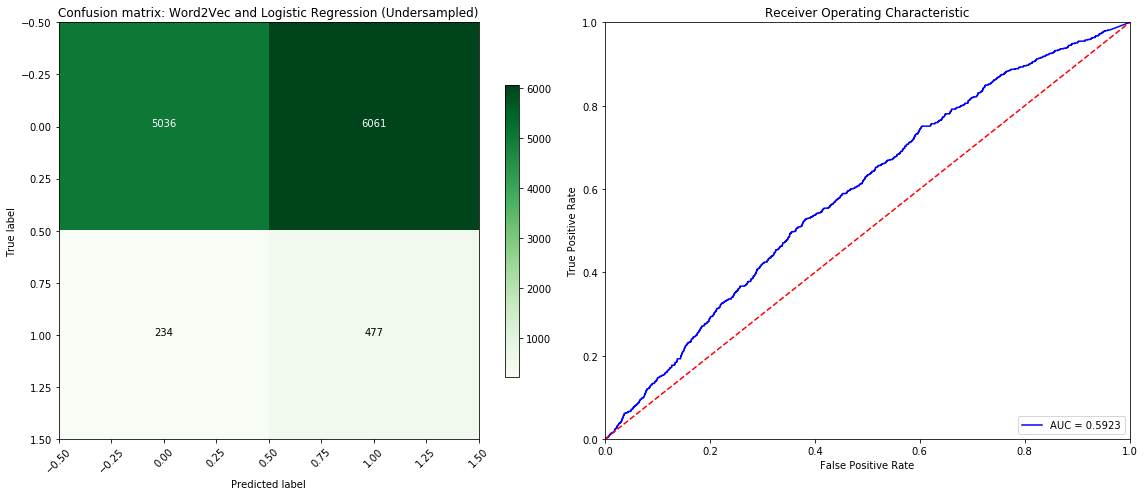

In [61]:
plt.figure(figsize=(16, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_rus, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Word2Vec and Logistic Regression (Undersampled)', 
                      cmap=plt.cm.Greens, ax=ax1)

# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=clf_rus, features=X_test_w2v, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()